In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lena_Image.png to Lena_Image.png


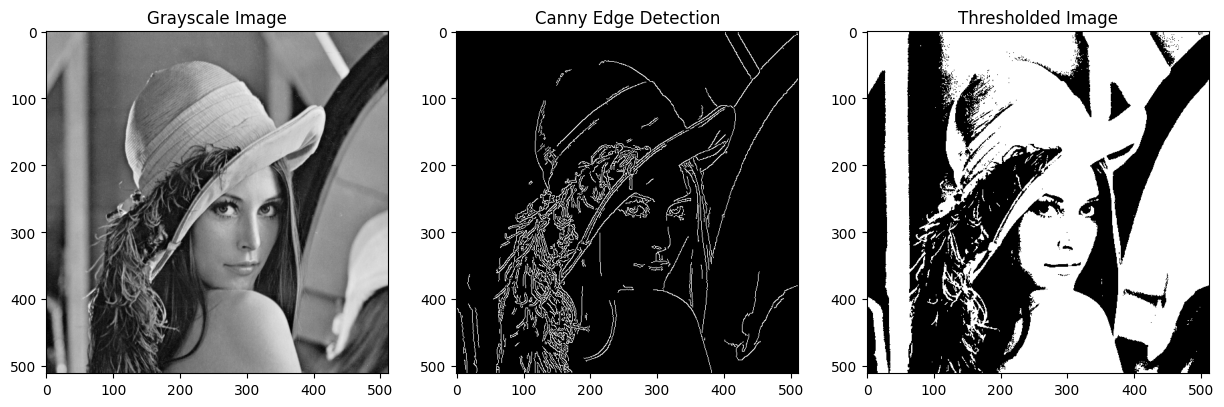

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 135MB/s]


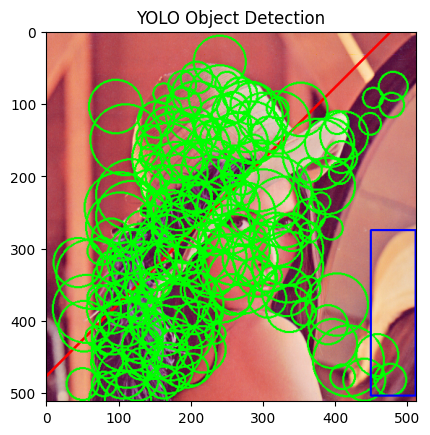

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import threshold_otsu
import torch
import torchvision.transforms as transforms
from torchvision import models

image = cv2.imread('/content/Lena_Image.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny_edges = cv2.Canny(gray, 100, 200)

thresh_value = threshold_otsu(gray)
binary = gray > thresh_value

edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

detected_circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=50)
if detected_circles is not None:
    detected_circles = np.uint16(np.around(detected_circles))
    for circle in detected_circles[0, :]:
        cv2.circle(image, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray, cmap='gray')
ax[0].set_title('Grayscale Image')
ax[1].imshow(canny_edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[2].imshow(binary, cmap='gray')
ax[2].set_title('Thresholded Image')
plt.show()

yolo_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
yolo_model.eval()
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)
with torch.no_grad():
    predictions = yolo_model(image_tensor)

boxes = predictions[0]['boxes'].numpy()
scores = predictions[0]['scores'].numpy()
labels = predictions[0]['labels'].numpy()

for i, box in enumerate(boxes):
    if scores[i] > 0.5:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('YOLO Object Detection')
plt.show()


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.59MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.94MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



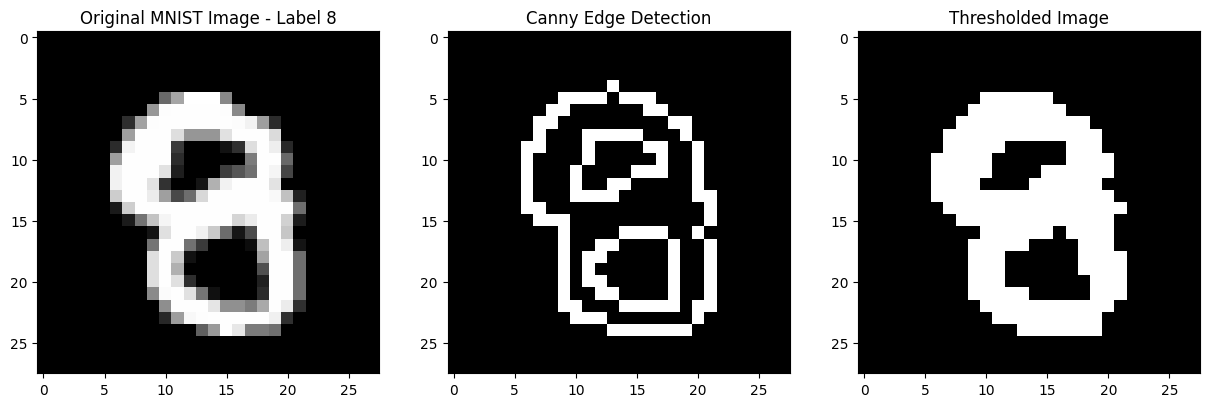

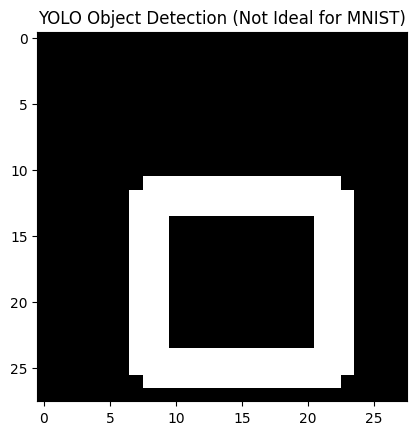

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader

mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
dataloader = DataLoader(mnist_dataset, batch_size=1, shuffle=True)

image, label = next(iter(dataloader))
image = image.squeeze().numpy()

canny_edges = cv2.Canny((image * 255).astype(np.uint8), 100, 200)

thresh_value = np.mean(image) * 255
_, binary = cv2.threshold((image * 255).astype(np.uint8), thresh_value, 255, cv2.THRESH_BINARY)

edges = cv2.Canny((image * 255).astype(np.uint8), 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title(f'Original MNIST Image - Label {label.item()}')
ax[1].imshow(canny_edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[2].imshow(binary, cmap='gray')
ax[2].set_title('Thresholded Image')
plt.show()

yolo_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
yolo_model.eval()
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
image_tensor = transform((image * 255).astype(np.uint8)).unsqueeze(0)
with torch.no_grad():
    predictions = yolo_model(image_tensor)

boxes = predictions[0]['boxes'].numpy()
scores = predictions[0]['scores'].numpy()
labels = predictions[0]['labels'].numpy()

for i, box in enumerate(boxes):
    if scores[i] > 0.5:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(image, cmap='gray')
plt.title('YOLO Object Detection (Not Ideal for MNIST)')
plt.show()


Files already downloaded and verified


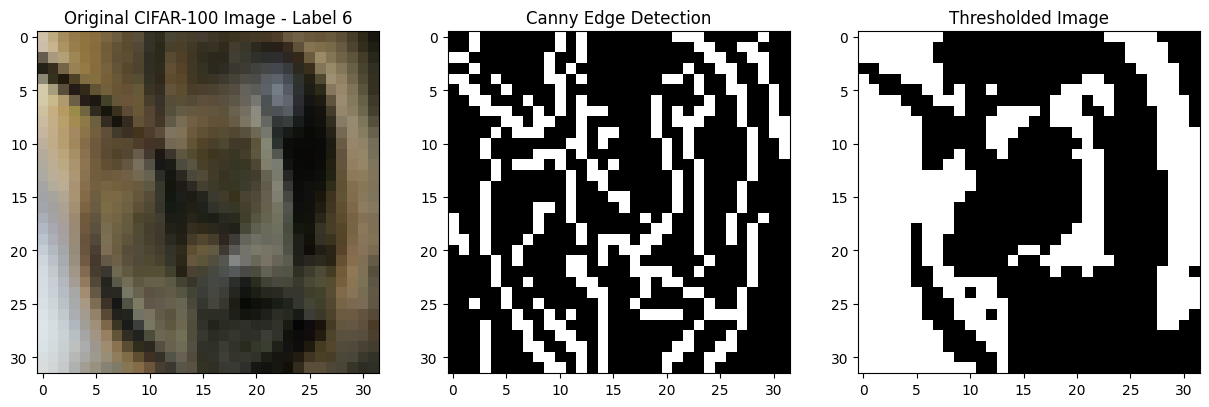

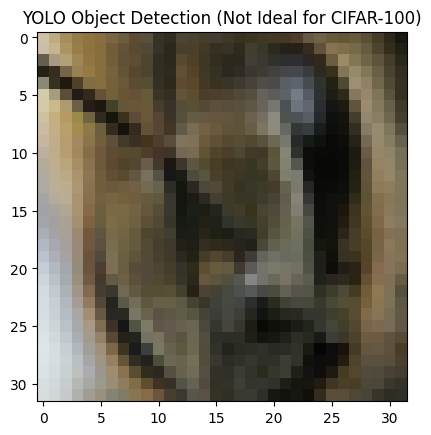

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision import models, datasets
from torch.utils.data import DataLoader

cifar100_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
dataloader = DataLoader(cifar100_dataset, batch_size=1, shuffle=True)

image, label = next(iter(dataloader))
image = image.squeeze(0)
image = image.permute(1, 2, 0).numpy()
image_gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)


canny_edges = cv2.Canny(image_gray, 100, 200)

thresh_value = np.mean(image_gray)
_, binary = cv2.threshold(image_gray, thresh_value, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(image_gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
if lines is not None:
    for rho, theta in lines[:, 0]:
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * (a))
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image)
ax[0].set_title(f'Original CIFAR-100 Image - Label {label.item()}')
ax[1].imshow(canny_edges, cmap='gray')
ax[1].set_title('Canny Edge Detection')
ax[2].imshow(binary, cmap='gray')
ax[2].set_title('Thresholded Image')
plt.show()

yolo_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
yolo_model.eval()
transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
image_tensor = transform((image * 255).astype(np.uint8)).unsqueeze(0)
with torch.no_grad():
    predictions = yolo_model(image_tensor)

boxes = predictions[0]['boxes'].numpy()
scores = predictions[0]['scores'].numpy()
labels = predictions[0]['labels'].numpy()

for i, box in enumerate(boxes):
    if scores[i] > 0.5:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(image)
plt.title('YOLO Object Detection (Not Ideal for CIFAR-100)')
plt.show()
